In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df= pd.read_csv('Loan-Approval-Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop('Loan_ID', axis= 1, inplace= True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
print('Gender        :', df.Gender.unique())
print('Education     :', df.Education.unique())
print('Self_Employed :', df.Self_Employed.unique())
print('Married       :', df.Married.unique())

Gender        : ['Male' 'Female' nan]
Education     : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Married       : ['No' 'Yes' nan]


# exploratory data analysis

In [7]:
# Distplot

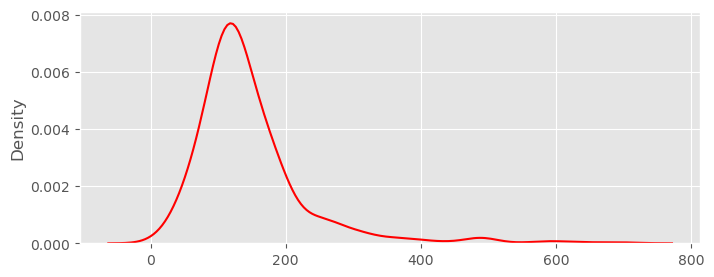

In [8]:
plt.figure(figsize = (8,3))
sns.distplot(x=df.LoanAmount, hist = False, color = 'red')
plt.show()

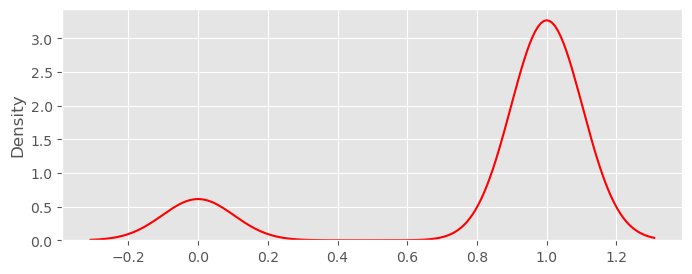

In [9]:
plt.figure(figsize = (8,3))
sns.distplot(x=df.Credit_History, hist = False, color = 'red')
plt.show()

In [10]:
# Lineplot

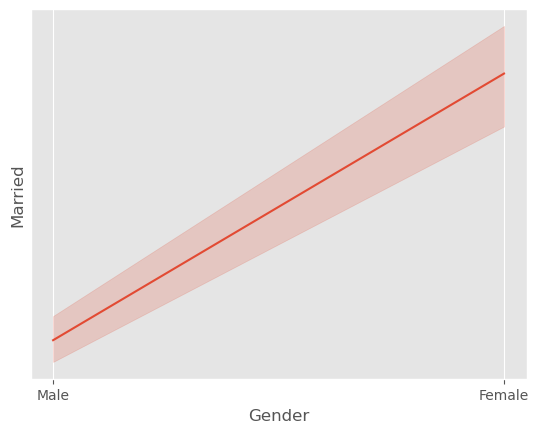

In [11]:
sns.lineplot(x= 'Gender', y= 'Married', data = df)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

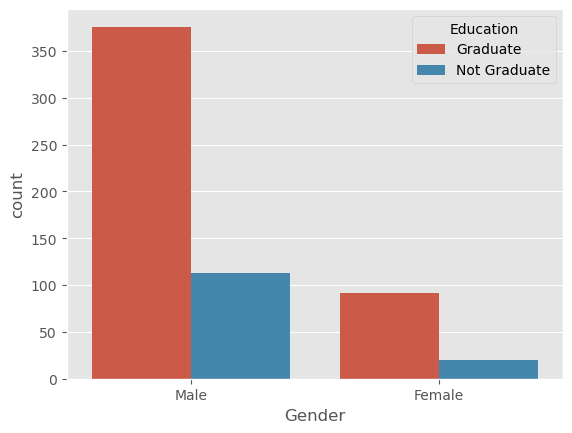

In [12]:

sns.countplot(x= 'Gender', data = df, hue= 'Education')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

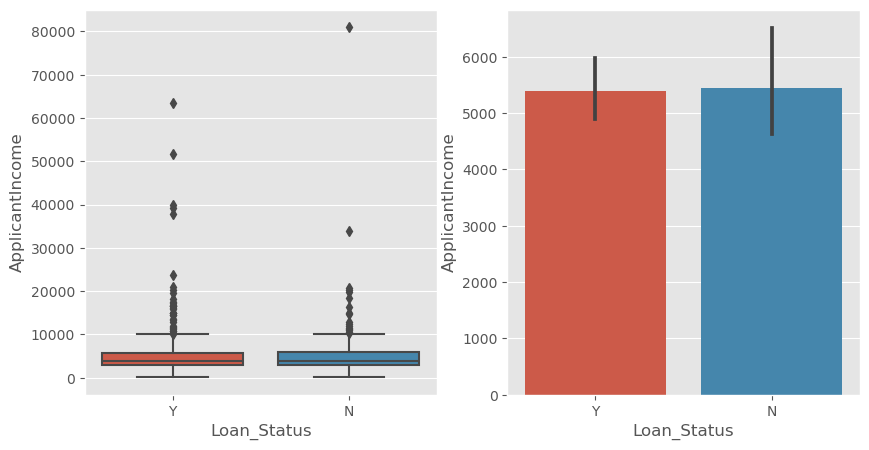

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data = df)
plt.subplot(1,2,2)
sns.barplot(x='Loan_Status', y='ApplicantIncome', data = df)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

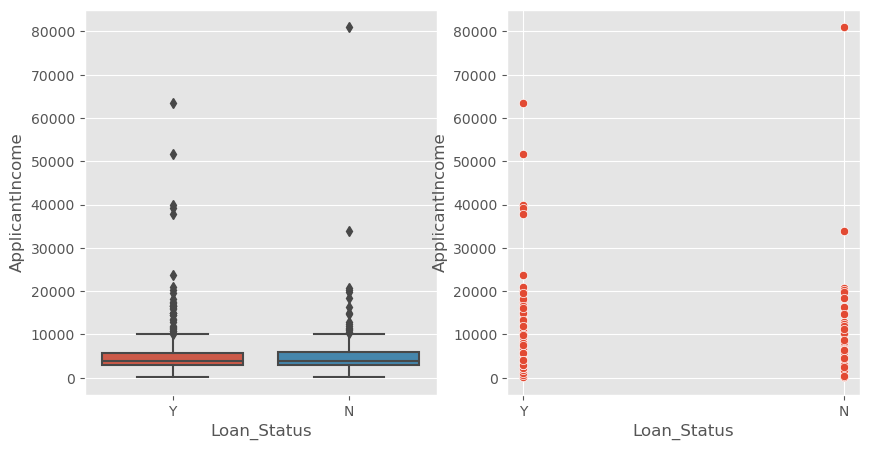

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data = df)
plt.subplot(1,2,2)
sns.scatterplot(x='Loan_Status', y='ApplicantIncome', data = df)

In [15]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<Axes: >

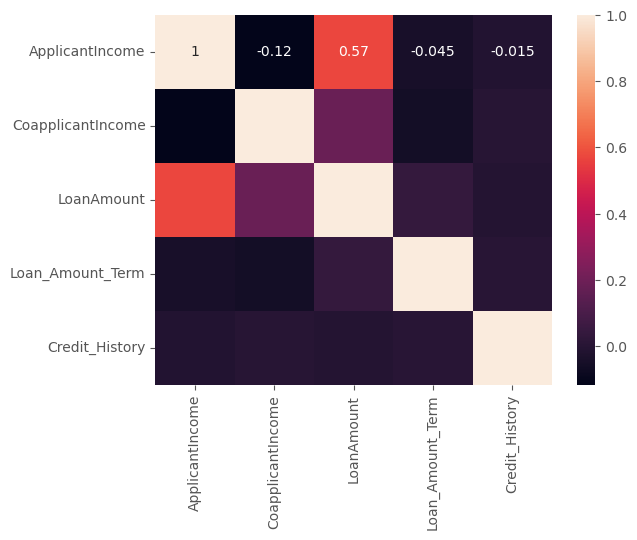

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot= True)

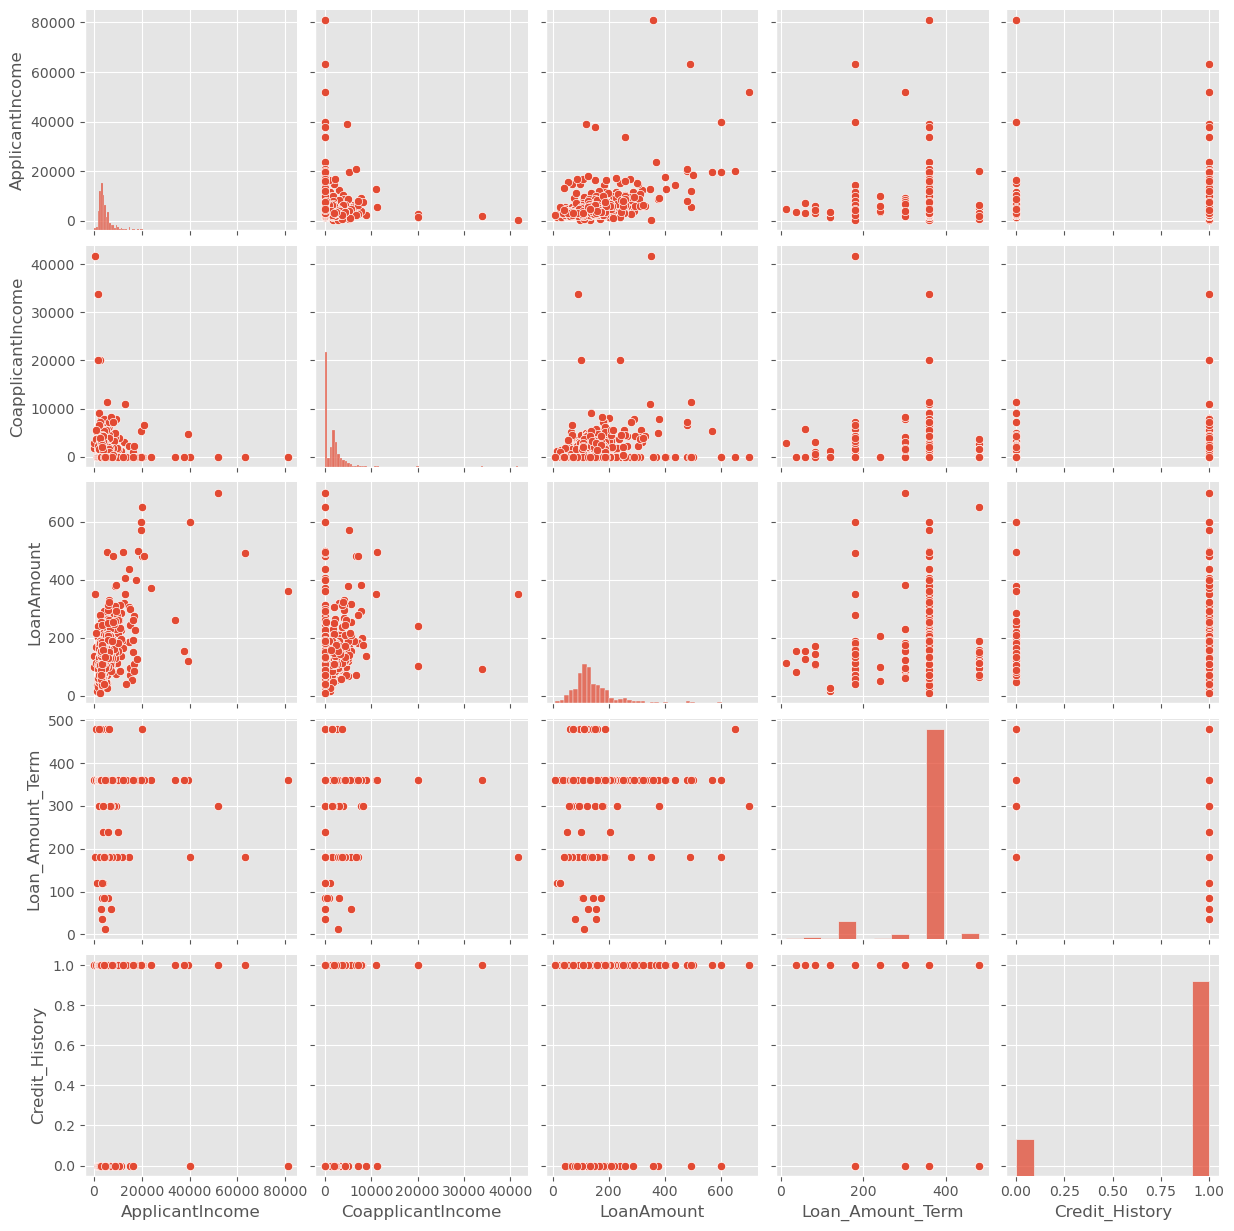

In [17]:
sns.pairplot(df)
           

In [18]:
col= ['Gender','Married','Dependents','Self_Employed','Education','Property_Area','Loan_Status']

In [19]:
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()

In [20]:
df[col] = encoder.fit_transform(df[col])

In [21]:
cols= ['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']

In [22]:
for cols in df.columns: 
  df[cols] = df[cols].fillna(df[cols].mean())  
    
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
X = df.drop(['Loan_Status'],axis=1) 
Y = df['Loan_Status'] 

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.25, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegression
re=LogisticRegression()

In [27]:
re.fit(x_train,y_train)
y_pred=re.predict(x_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


In [28]:
columns_names=['Gender','Married','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Education','Property_Area','Loan_Status']
x_test_df=pd.DataFrame(x_test,columns=columns_names)
x_test_df['Loan_status_predicted']=y_pred
print(x_test_df.tail())

       Gender   Married  Dependents  Self_Employed  ApplicantIncome  \
149  0.499148 -1.305355   -0.743081       1.873447         0.006388   
150 -2.050640  0.767700    1.253559       1.873447         0.006388   
151 -2.050640  0.767700   -0.743081      -0.533775        -0.410492   
152  0.499148  0.767700    1.253559      -0.533775        -0.410492   
153  0.499148 -1.305355   -0.743081      -0.533775        -0.410492   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Education  \
149          -0.487188    0.170924         -0.251914    0.30786   
150          -0.876070    0.502951         -0.584781    0.30786   
151          -0.384816   -0.603933         -1.321844    0.30786   
152          -0.179738   -0.603933         -0.240026    0.30786   
153          -0.287761   -0.603933         -0.406460    2.08138   

     Property_Area  Loan_Status  Loan_status_predicted  
149       0.447706    -1.335395                    1.0  
150       0.447706    -0.058302                    1.0  

In [29]:
print('Training Score :', re.score(x_train,y_train))
print('Testing Score :', re.score(x_test,y_test))

Training Score : 0.8217391304347826
Testing Score : 0.7727272727272727


In [30]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 

In [31]:

rfc = RandomForestClassifier(n_estimators = 5, 
                             criterion = 'entropy')
                              


In [32]:
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(y_pred)

[1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]


In [33]:
x_test_df=pd.DataFrame(x_test,columns=columns_names)
x_test_df['Loan_status_predicted']=y_pred
print(x_test_df.tail())

       Gender   Married  Dependents  Self_Employed  ApplicantIncome  \
149  0.499148 -1.305355   -0.743081       1.873447         0.006388   
150 -2.050640  0.767700    1.253559       1.873447         0.006388   
151 -2.050640  0.767700   -0.743081      -0.533775        -0.410492   
152  0.499148  0.767700    1.253559      -0.533775        -0.410492   
153  0.499148 -1.305355   -0.743081      -0.533775        -0.410492   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Education  \
149          -0.487188    0.170924         -0.251914    0.30786   
150          -0.876070    0.502951         -0.584781    0.30786   
151          -0.384816   -0.603933         -1.321844    0.30786   
152          -0.179738   -0.603933         -0.240026    0.30786   
153          -0.287761   -0.603933         -0.406460    2.08138   

     Property_Area  Loan_Status  Loan_status_predicted  
149       0.447706    -1.335395                    1.0  
150       0.447706    -0.058302                    1.0  

In [34]:
print('Training Set Accuracy : ', rfc.score(x_train,y_train))
print('Testing  Set Accuracy : ', rfc.score(x_test,y_test))

Training Set Accuracy :  0.9782608695652174
Testing  Set Accuracy :  0.7272727272727273


In [35]:
knn = KNeighborsClassifier(n_neighbors=3) 

In [36]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [37]:
x_test_df=pd.DataFrame(x_test,columns=columns_names)
x_test_df['Loan_status_predicted']=y_pred
print(x_test_df.tail())

       Gender   Married  Dependents  Self_Employed  ApplicantIncome  \
149  0.499148 -1.305355   -0.743081       1.873447         0.006388   
150 -2.050640  0.767700    1.253559       1.873447         0.006388   
151 -2.050640  0.767700   -0.743081      -0.533775        -0.410492   
152  0.499148  0.767700    1.253559      -0.533775        -0.410492   
153  0.499148 -1.305355   -0.743081      -0.533775        -0.410492   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Education  \
149          -0.487188    0.170924         -0.251914    0.30786   
150          -0.876070    0.502951         -0.584781    0.30786   
151          -0.384816   -0.603933         -1.321844    0.30786   
152          -0.179738   -0.603933         -0.240026    0.30786   
153          -0.287761   -0.603933         -0.406460    2.08138   

     Property_Area  Loan_Status  Loan_status_predicted  
149       0.447706    -1.335395                    1.0  
150       0.447706    -0.058302                    1.0  

In [38]:
print('Training Set Accuracy : ', knn.score(x_train,y_train))
print('Testing  Set Accuracy : ', knn.score(x_test,y_test))

Training Set Accuracy :  0.8521739130434782
Testing  Set Accuracy :  0.7597402597402597


In [39]:
svc = SVC() 

In [40]:
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [41]:
x_test_df=pd.DataFrame(x_test,columns=columns_names)
x_test_df['Loan_status_predicted']=y_pred
print(x_test_df.tail())

       Gender   Married  Dependents  Self_Employed  ApplicantIncome  \
149  0.499148 -1.305355   -0.743081       1.873447         0.006388   
150 -2.050640  0.767700    1.253559       1.873447         0.006388   
151 -2.050640  0.767700   -0.743081      -0.533775        -0.410492   
152  0.499148  0.767700    1.253559      -0.533775        -0.410492   
153  0.499148 -1.305355   -0.743081      -0.533775        -0.410492   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Education  \
149          -0.487188    0.170924         -0.251914    0.30786   
150          -0.876070    0.502951         -0.584781    0.30786   
151          -0.384816   -0.603933         -1.321844    0.30786   
152          -0.179738   -0.603933         -0.240026    0.30786   
153          -0.287761   -0.603933         -0.406460    2.08138   

     Property_Area  Loan_Status  Loan_status_predicted  
149       0.447706    -1.335395                    1.0  
150       0.447706    -0.058302                    1.0  

In [42]:
print('Training Set Accuracy : ', svc.score(x_train,y_train))
print('Testing  Set Accuracy : ', svc.score(x_test,y_test))

Training Set Accuracy :  0.8326086956521739
Testing  Set Accuracy :  0.7857142857142857
